In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Read cleaned, merged SCADA data and perform EDA

In [76]:
df = pd.read_csv(r'C:\Users\Linds\Repos\East_River\Data\Processed\Cleaned_SCADA_Data.csv')

In [77]:
#check for missing values
print(df.isnull().sum())

Unnamed: 0                              0
Timestamp                               0
OnLine_Load_MW                        239
Load_Control_KW                         0
Load_Control_MW                         0
Estimated_Online_Load_Control_MW    68632
Control_Threshold_MW                    0
dtype: int64


Find rows with missing values

In [78]:
missing_online = df[df['OnLine_Load_MW'].isnull()]
print(missing_online)

       Unnamed: 0         Timestamp  OnLine_Load_MW  Load_Control_KW  \
69881      454996   12/27/2024 0:30             NaN              0.0   
69882      454997   12/27/2024 1:00             NaN              0.0   
69883      454998   12/27/2024 1:30             NaN              0.0   
69884      454999   12/27/2024 2:00             NaN              0.0   
69885      455000   12/27/2024 2:30             NaN              0.0   
...           ...               ...             ...              ...   
70115      455230  12/31/2024 21:30             NaN            552.0   
70116      455231  12/31/2024 22:00             NaN            552.0   
70117      455232  12/31/2024 22:30             NaN            552.0   
70118      455233  12/31/2024 23:00             NaN            552.0   
70119      455234  12/31/2024 23:30             NaN            552.0   

       Load_Control_MW  Estimated_Online_Load_Control_MW  Control_Threshold_MW  
69881            0.000                               N

Ask about values from 12/27/2024 - EOY - Jesse

Check for duplicates

In [79]:
# check for duplicate rows in the dataframe df
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows in df:", duplicate_rows.shape[0])
print(duplicate_rows)

Number of duplicate rows in df: 0
Empty DataFrame
Columns: [Unnamed: 0, Timestamp, OnLine_Load_MW, Load_Control_KW, Load_Control_MW, Estimated_Online_Load_Control_MW, Control_Threshold_MW]
Index: []


In [80]:
# convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# sort the dataframe by Timestamp (if not sorted already)
df.sort_values('Timestamp', inplace=True)

# calculate the differences between consecutive timestamps
time_diffs = df['Timestamp'].diff().dropna().unique()

print("Unique time differences between consecutive timestamps:")
print(time_diffs)

# verify if there's only one difference and if it's 30 minutes
expected_diff = pd.Timedelta(minutes=30)
if len(time_diffs) == 1 and time_diffs[0] == expected_diff:
    print("Timestamps are continuous with a 30-minute interval.")
else:
    print("Timestamps are not continuous.")

Unique time differences between consecutive timestamps:
<TimedeltaArray>
['0 days 00:30:00', '0 days 01:30:00']
Length: 2, dtype: timedelta64[ns]
Timestamps are not continuous.


In [81]:
# get the full range of timestamps with 30-min intervals
full_range = pd.date_range(start=df['Timestamp'].min(), end=df['Timestamp'].max(), freq='30T')

# find missing timestamps by comparing the full range with the existing Timestamp column
missing_timestamps = full_range.difference(df['Timestamp'])
print("Missing timestamps:")
print(missing_timestamps)

Missing timestamps:
DatetimeIndex(['2021-03-14 02:00:00', '2021-03-14 02:30:00',
               '2022-03-13 02:00:00', '2022-03-13 02:30:00',
               '2023-03-12 02:00:00', '2023-03-12 02:30:00',
               '2024-03-10 02:00:00', '2024-03-10 02:30:00'],
              dtype='datetime64[ns]', freq=None)


Possible dayliht savings glitch? - Ask about interpolation  

Statistics Summary

In [82]:
# Display DataFrame information
df.info()

# Display DataFrame statistical summary
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70120 entries, 0 to 70119
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        70120 non-null  int64         
 1   Timestamp                         70120 non-null  datetime64[ns]
 2   OnLine_Load_MW                    69881 non-null  float64       
 3   Load_Control_KW                   70120 non-null  float64       
 4   Load_Control_MW                   70120 non-null  float64       
 5   Estimated_Online_Load_Control_MW  1488 non-null   float64       
 6   Control_Threshold_MW              70120 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.7 MB


,Unnamed: 0,Timestamp,OnLine_Load_MW,Load_Control_KW,Load_Control_MW,Estimated_Online_Load_Control_MW,Control_Threshold_MW
count,70120.000000,70120,69881.000000,70120.000000,70120.000000,1488.000000,70120.000000
mean,273129.408871,2023-01-01 12:03:27.929264128,495.284792,5062.671761,5.062672,643.201890,593.493681
min,0.000000,2021-01-01 00:00:00,259.630000,0.000000,0.000000,493.000000,395.000000
25%,114866.750000,2022-01-01 05:52:30,435.360000,0.000000,0.000000,573.659250,562.000000
50%,229733.500000,2023-01-01 11:45:00,492.490000,0.000000,0.000000,625.723500,590.000000
75%,344600.250000,2024-01-01 17:37:30,551.180000,535.000000,0.535000,711.307500,627.000000
max,455234.000000,2024-12-31 23:30:00,855.260000,140681.000000,140.681000,907.724000,813.700000
std,129037.458671,NaN,79.891337,17427.087355,17.427087,87.769577,66.391267


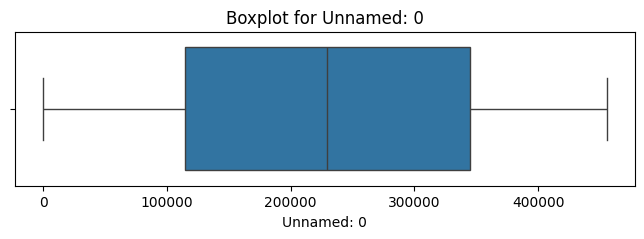

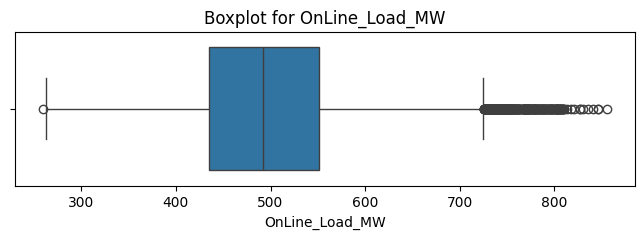

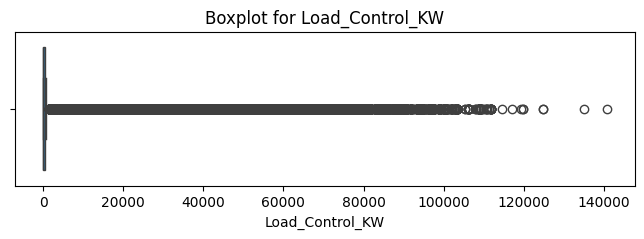

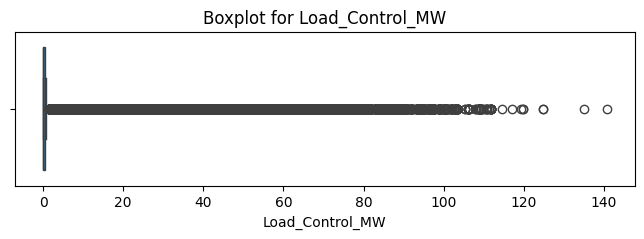

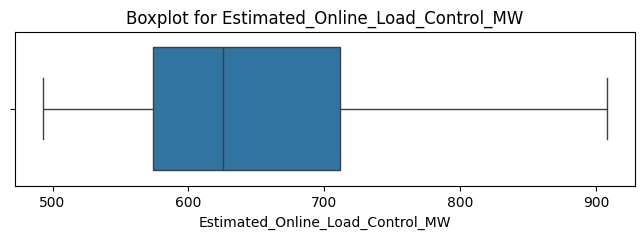

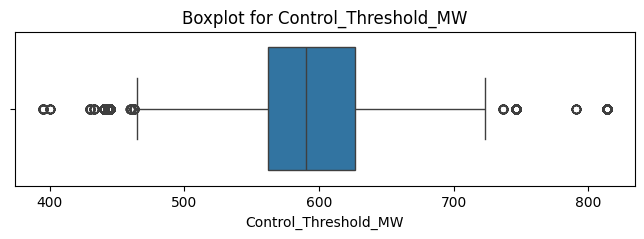

Unnamed: 0: 0 outliers
OnLine_Load_MW: 331 outliers
Load_Control_KW: 6877 outliers
Load_Control_MW: 6877 outliers
Estimated_Online_Load_Control_MW: 0 outliers
Control_Threshold_MW: 3589 outliers


In [83]:
# Check for outliers using boxplots for all numerical columns

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Alternatively, use the IQR method to identify outliers for each numerical column

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

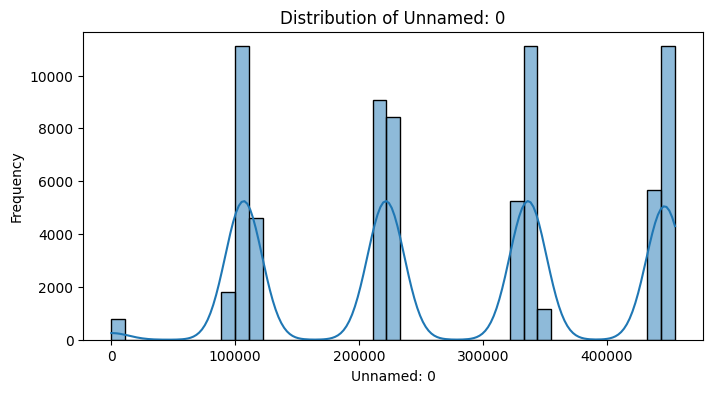

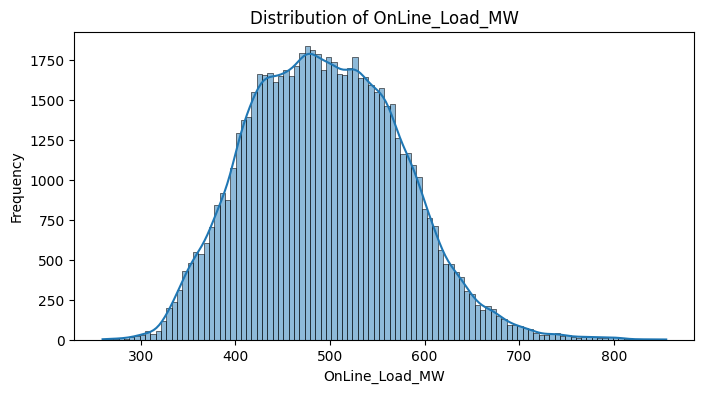

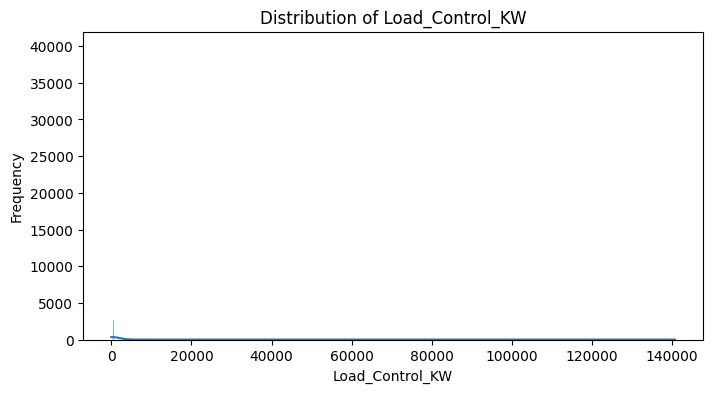

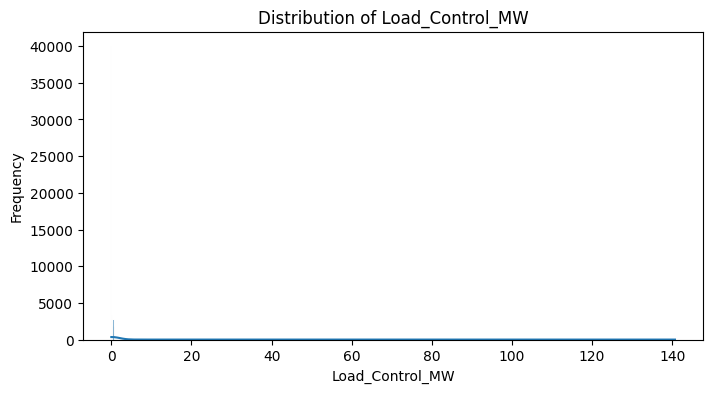

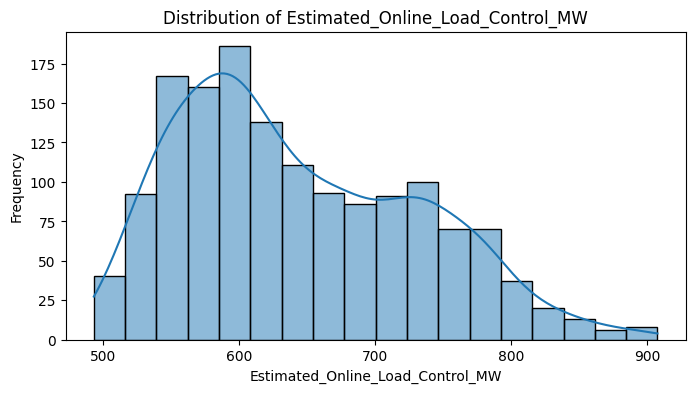

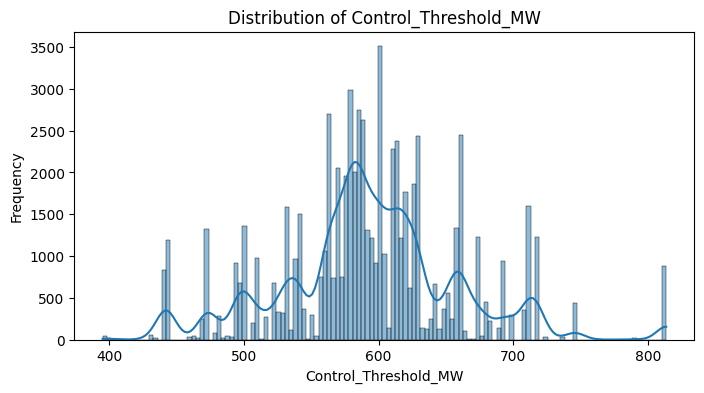

In [60]:
# Examine data distribution for all numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

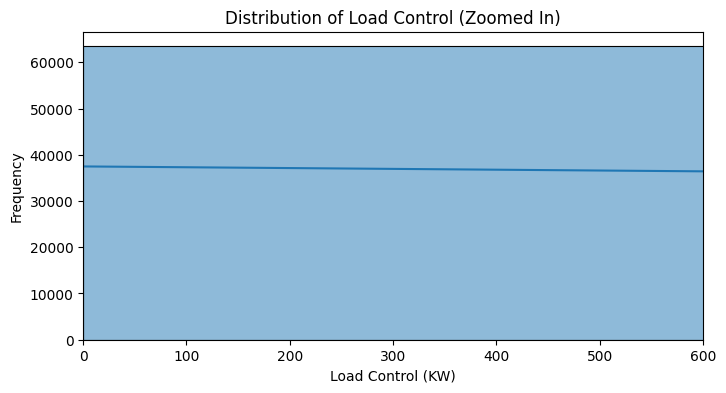

In [61]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Load_Control_KW'], bins=50, kde=True)
plt.xlim(0, 600)
plt.xlabel('Load Control (KW)')
plt.ylabel('Frequency')
plt.title('Distribution of Load Control (Zoomed In)')
plt.show()

In [62]:
# Compute IQR for the 'OnLine_Load_MW' column
column = 'OnLine_Load_MW'
non_null_values = df[column].dropna()

Q1_mw = non_null_values.quantile(0.25)
Q3_mw = non_null_values.quantile(0.75)
IQR_mw = Q3_mw - Q1_mw

# Define lower and upper bounds for outliers
lower_bound_mw = Q1_mw - 1.5 * IQR_mw
upper_bound_mw = Q3_mw + 1.5 * IQR_mw

print(f"{column} - Q1: {Q1_mw}, Q3: {Q3_mw}, IQR: {IQR_mw}")
print(f"Lower bound: {lower_bound_mw}, Upper bound: {upper_bound_mw}")

# Identify outliers in the 'OnLine_Load_MW' column
outliers_mw = df[(df[column] < lower_bound_mw) | (df[column] > upper_bound_mw)]
print(f"Number of outliers in {column}: {outliers_mw.shape[0]}")
print(outliers_mw)

OnLine_Load_MW - Q1: 435.36, Q3: 551.18, IQR: 115.81999999999994
Lower bound: 261.6300000000001, Upper bound: 724.9099999999999
Number of outliers in OnLine_Load_MW: 331
       Unnamed: 0           Timestamp  OnLine_Load_MW  Load_Control_KW  \
17803      115140 2022-01-06 22:30:00          731.94            728.0   
20037      214710 2022-02-22 11:30:00          737.68            650.0   
23857      218530 2022-05-13 02:30:00          259.63           2080.0   
34573      229246 2022-12-22 08:30:00          729.60          65173.0   
34579      229252 2022-12-22 11:30:00          769.62            612.0   
...           ...                 ...             ...              ...   
53532      438647 2024-01-21 09:00:00          734.20            707.0   
53533      438648 2024-01-21 09:30:00          734.95            707.0   
53534      438649 2024-01-21 10:00:00          728.27            707.0   
69183      454298 2024-12-12 11:30:00          733.32            552.0   
69231      45434

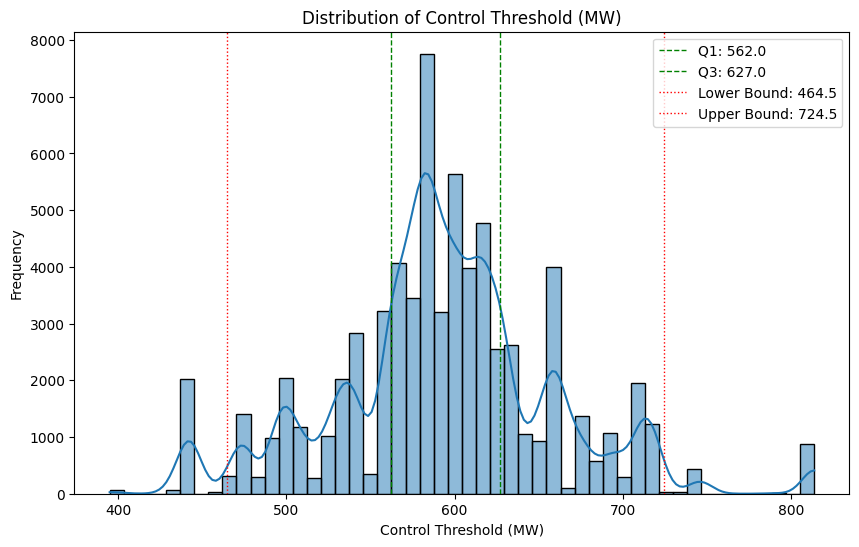

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(df['Control_Threshold_MW'], bins=50, kde=True)
plt.axvline(Q1, color='green', linestyle='dashed', linewidth=1, label=f'Q1: {Q1}')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=1, label=f'Q3: {Q3}')
plt.axvline(lower_bound, color='red', linestyle='dotted', linewidth=1, label=f'Lower Bound: {lower_bound}')
plt.axvline(upper_bound, color='red', linestyle='dotted', linewidth=1, label=f'Upper Bound: {upper_bound}')
plt.xlabel('Control Threshold (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Control Threshold (MW)')
plt.legend()
plt.show()

Outlier detection (using the IQR method and boxplots) has flagged several points in the numerical columns, suggesting some measurements fall far outside the typical range.

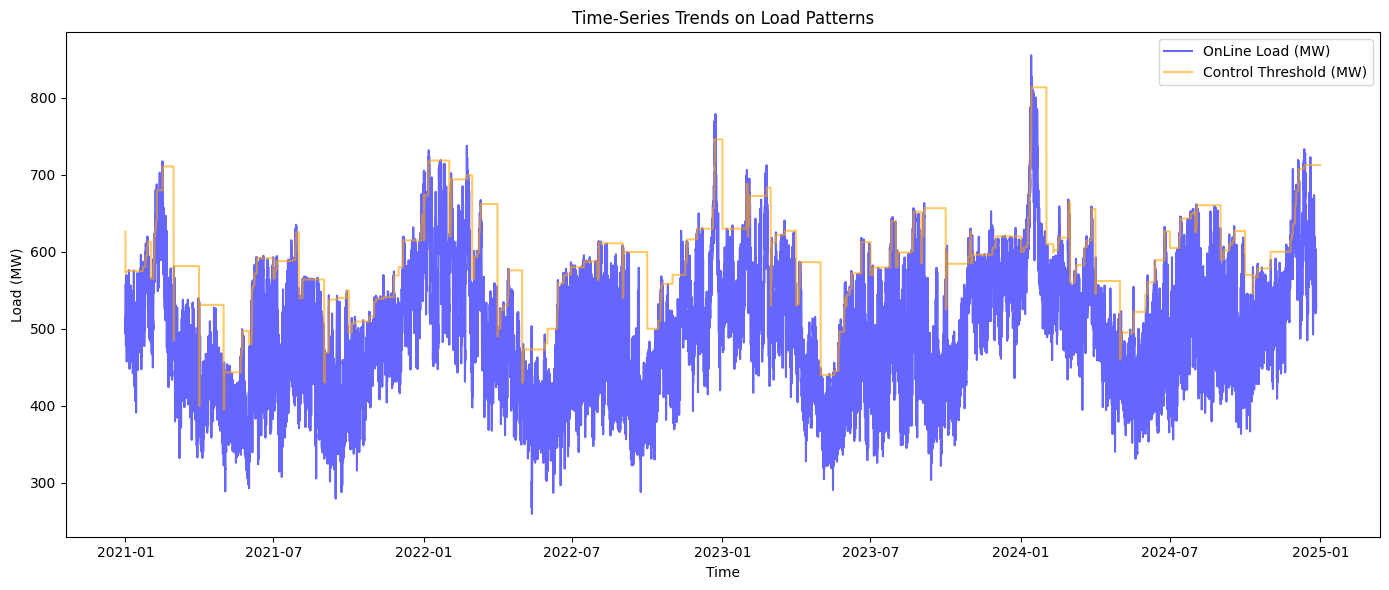

In [64]:
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['OnLine_Load_MW'], label='OnLine Load (MW)', color='blue', alpha=0.6)
plt.plot(df['Timestamp'], df['Control_Threshold_MW'], label='Control Threshold (MW)', color='orange', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.title('Time-Series Trends on Load Patterns')
plt.legend()
plt.tight_layout()
plt.show()

seasonality in the load patterns, slow stable continued climb in MW load. 

The IQR values show that most control thresholds stay within a 65 KW range (from 562 to 627) and most online loads within a 115.82 MW range (from 435.36 to 551.18). In other words, the deviations (based on the IQR) are relatively tight, with only occasional values falling outside the lower and upper bounds, which are flagged as outliers.

In [65]:
# Frequency for Control_Threshold_MW deviations
deviations_control = df[(df['Control_Threshold_MW'] < lower_bound) | (df['Control_Threshold_MW'] > upper_bound)]
print("Control_Threshold_MW deviations count:", deviations_control.shape[0])
print("Percentage of deviations (Control_Threshold_MW): {:.2%}".format(deviations_control.shape[0] / df.shape[0]))

# Frequency for OnLine_Load_MW deviations (only non-null values)
deviations_online = df[(df['OnLine_Load_MW'] < lower_bound_mw) | (df['OnLine_Load_MW'] > upper_bound_mw)]
online_valid = df['OnLine_Load_MW'].notnull().sum()
print("OnLine_Load_MW deviations count:", deviations_online.shape[0])
print("Percentage of deviations (OnLine_Load_MW): {:.2%}".format(deviations_online.shape[0] / online_valid))

Control_Threshold_MW deviations count: 3589
Percentage of deviations (Control_Threshold_MW): 5.12%
OnLine_Load_MW deviations count: 331
Percentage of deviations (OnLine_Load_MW): 0.47%


control activations might be triggered by specific conditions rather than following a smooth, predictive pattern, leading to the observed erratic deviations.

In [66]:
# For the control threshold exceedances
control_exceedances = df[(df['Control_Threshold_MW'] < lower_bound) | (df['Control_Threshold_MW'] > upper_bound)]
control_freq = control_exceedances.shape[0]
control_pct = control_freq / df.shape[0] * 100

# Compute the severity difference for each exceedance in Control_Threshold_MW.
# For values above the upper bound, severity = value - upper_bound.
# For values below the lower bound, severity = lower_bound - value.
control_exceedances = control_exceedances.copy()
control_exceedances['Severity'] = control_exceedances['Control_Threshold_MW'].apply(
    lambda x: x - upper_bound if x > upper_bound else (lower_bound - x if x < lower_bound else 0)
)

print("Control Threshold Exceedances:")
print(f"Frequency: {control_freq} rows ({control_pct:.2f}% of total rows)")
print("Severity stats:")
print(control_exceedances['Severity'].describe())

# For the online load threshold exceedances
online_exceedances = df[(df['OnLine_Load_MW'] < lower_bound_mw) | (df['OnLine_Load_MW'] > upper_bound_mw)]
online_freq = online_exceedances.shape[0]
online_pct = online_freq / online_valid * 100  # online_valid already defined

# Compute severity for OnLine_Load_MW exceedances
online_exceedances = online_exceedances.copy()
online_exceedances['Severity'] = online_exceedances['OnLine_Load_MW'].apply(
    lambda x: x - upper_bound_mw if x > upper_bound_mw else (lower_bound_mw - x if x < lower_bound_mw else 0)
)

print("\nOnline Load Exceedances:")
print(f"Frequency: {online_freq} rows ({online_pct:.2f}% of non-null online load measurements)")
print("Severity stats:")
print(online_exceedances['Severity'].describe())

Control Threshold Exceedances:
Frequency: 3589 rows (5.12% of total rows)
Severity stats:
count    3589.000000
mean       39.225244
std        29.344003
min         2.100000
25%        21.100000
50%        24.500000
75%        69.500000
max        89.200000
Name: Severity, dtype: float64

Online Load Exceedances:
Frequency: 331 rows (0.47% of non-null online load measurements)
Severity stats:
count    331.000000
mean      36.238157
std       27.689472
min        0.290000
25%       12.970000
50%       28.450000
75%       55.655000
max      130.350000
Name: Severity, dtype: float64


A control threshold exceedance occurs when the measured value for the control threshold (in the Control_Threshold_MW column) falls outside a predefined acceptable range. In this analysis, that acceptable range is determined using the interquartile range (IQR): values below the lower bound or above the upper bound (computed from Q1 and Q3) are flagged as exceedances. The exceedance's severity is calculated based on how far the value is from its corresponding bound.

An online load exceedance occurs when the measured value in the OnLine_Load_MW column falls outside the acceptable range defined by the interquartile range (IQR). For the online load, the acceptable range is determined using Q1_mw and Q3_mw such that values below the lower bound (Q1_mw - 1.5 * IQR_mw) or above the upper bound (Q3_mw + 1.5 * IQR_mw) are flagged as exceedances. The severity of each exceedance is calculated based on how far the value is from its corresponding boundary.

Load Difference Statistics for 2024:
count    1488.000000
mean      -11.973012
std        26.627128
min      -100.014000
25%        -0.707000
50%        -0.707000
75%         0.000000
max         0.000000
Name: Load_Difference, dtype: float64


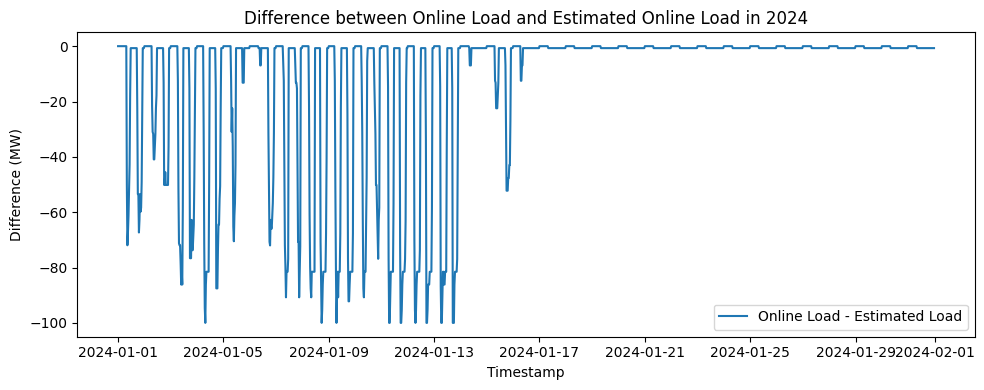

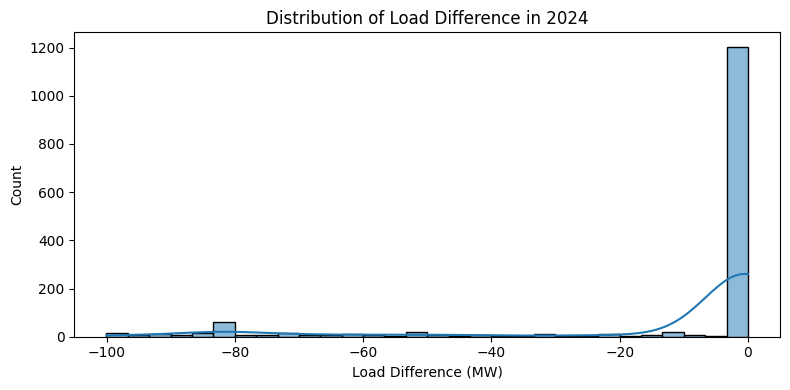

In [67]:
# Filter the dataframe for records from 2024
df_2024 = df[df['Timestamp'].dt.year == 2024].copy()

# Drop rows where either online load or estimated online load is missing,
# so we can validly compute the difference.
df_2024 = df_2024.dropna(subset=['OnLine_Load_MW', 'Estimated_Online_Load_Control_MW'])

# Calculate the difference: online load minus estimated online load
df_2024['Load_Difference'] = df_2024['OnLine_Load_MW'] - df_2024['Estimated_Online_Load_Control_MW']

# Show summary statistics of the load difference
print("Load Difference Statistics for 2024:")
print(df_2024['Load_Difference'].describe())

# Plot difference over time to examine trends
plt.figure(figsize=(10, 4))
plt.plot(df_2024['Timestamp'], df_2024['Load_Difference'], label='Online Load - Estimated Load')
plt.xlabel('Timestamp')
plt.ylabel('Difference (MW)')
plt.title('Difference between Online Load and Estimated Online Load in 2024')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the distribution of the load difference
plt.figure(figsize=(8, 4))
sns.histplot(df_2024['Load_Difference'], bins=30, kde=True)
plt.xlabel('Load Difference (MW)')
plt.title('Distribution of Load Difference in 2024')
plt.tight_layout()
plt.show()

The analysis shows that the estimated online load generally tracks the actual measurements very well. In 2024 the differences are close to zero with little spread, meaning the estimation is well calibrated overall. There are a few flagged outliers (with higher severity values), which indicate specific conditions where the estimation deviates significantly. Overall, the tight ranges and minimal differences suggest good performance of the estimation.

In [68]:
# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (df_2024['Load_Difference'].abs() / df_2024['OnLine_Load_MW']).mean() * 100

# Define accuracy rate as 100% minus the MAPE
accuracy_rate = 100 - mape
print(f"Load Estimation Accuracy Rate: {accuracy_rate:.2f}%")

Load Estimation Accuracy Rate: 98.14%


In [69]:
# Calculate the IQR for the load difference between measured and estimated online load
Q1_diff = df_2024['Load_Difference'].quantile(0.25)
Q3_diff = df_2024['Load_Difference'].quantile(0.75)
IQR_diff = Q3_diff - Q1_diff

lower_bound_diff = Q1_diff - 1.5 * IQR_diff
upper_bound_diff = Q3_diff + 1.5 * IQR_diff

# Filter rows where the load difference is an outlier
outlier_load_diff = df_2024[(df_2024['Load_Difference'] < lower_bound_diff) | (df_2024['Load_Difference'] > upper_bound_diff)]

print("Estimated Online Load Deviations Outliers:")
print(outlier_load_diff[['Timestamp', 'OnLine_Load_MW', 'Estimated_Online_Load_Control_MW', 'Load_Difference']])

Estimated Online Load Deviations Outliers:
                Timestamp  OnLine_Load_MW  Estimated_Online_Load_Control_MW  \
52570 2024-01-01 08:00:00          603.83                           653.997   
52571 2024-01-01 08:30:00          596.71                           668.671   
52572 2024-01-01 09:00:00          601.15                           668.491   
52573 2024-01-01 09:30:00          594.84                           656.112   
52574 2024-01-01 10:00:00          593.61                           645.642   
...                   ...             ...                               ...   
53269 2024-01-15 21:30:00          810.08                           837.147   
53288 2024-01-16 07:00:00          806.13                           818.630   
53289 2024-01-16 07:30:00          802.94                           815.440   
53290 2024-01-16 08:00:00          802.84                           809.797   
53291 2024-01-16 08:30:00          804.09                           811.047   

       L

Descriptive Statistics for Load Difference Outliers:
count    285.000000
mean     -60.651200
std       27.758477
min     -100.014000
25%      -81.534000
50%      -70.512000
75%      -40.722000
max       -5.327000
Name: Load_Difference, dtype: float64


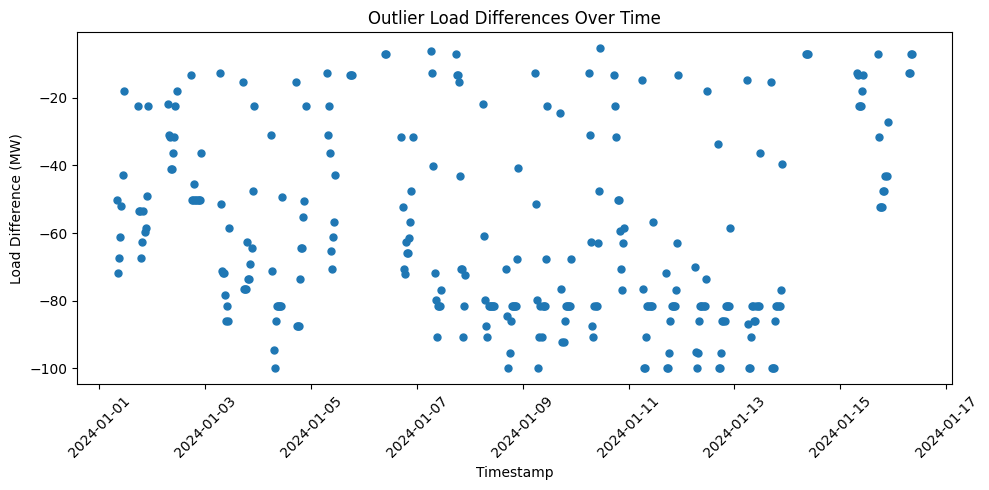

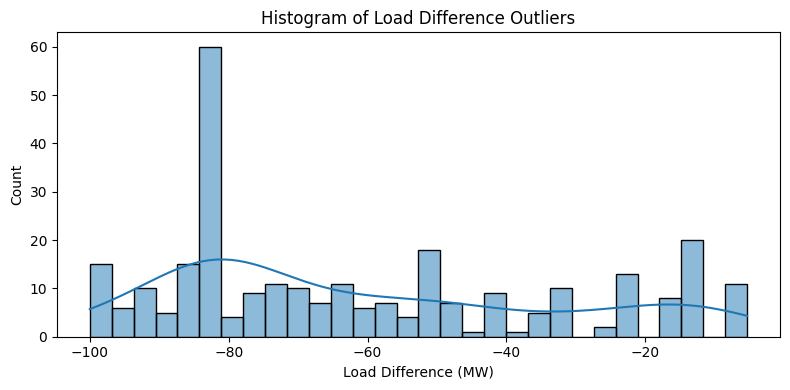

In [70]:
# Analyze load difference outliers

# Descriptive statistics of load differences
print("Descriptive Statistics for Load Difference Outliers:")
print(outlier_load_diff['Load_Difference'].describe())

# Plot load difference outliers over time to observe any temporal patterns
plt.figure(figsize=(10, 5))
plt.plot(outlier_load_diff['Timestamp'], outlier_load_diff['Load_Difference'], 'o', markersize=5)
plt.xlabel('Timestamp')
plt.ylabel('Load Difference (MW)')
plt.title('Outlier Load Differences Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot a histogram to check the distribution of load differences in outliers
plt.figure(figsize=(8, 4))
sns.histplot(outlier_load_diff['Load_Difference'], bins=30, kde=True)
plt.xlabel('Load Difference (MW)')
plt.title('Histogram of Load Difference Outliers')
plt.tight_layout()
plt.show()

The analysis shows that while our load estimation is generally highly accurate (with most differences near zero and a tight IQR of about 0.71 MW), we do observe a few outlier cases where the estimated load deviates significantly from the measured value. These outliers suggest that under rare or specific conditions—possibly due to unusual operational events—the control estimation can differ notably. Investigating these instances further may help identify if there are systematic factors or transient anomalies affecting the estimation.

Summary of unusual operation events:
                 Timestamp  OnLine_Load_MW  Estimated_Online_Load_Control_MW  \
count                   15       15.000000                         15.000000   
mean   2024-01-11 14:14:00      693.121333                        793.135333   
min    2024-01-04 07:30:00      588.950000                        688.964000   
25%    2024-01-11 07:15:00      634.960000                        734.974000   
50%    2024-01-12 07:00:00      681.120000                        781.134000   
75%    2024-01-13 06:45:00      729.325000                        829.339000   
max    2024-01-13 18:00:00      807.710000                        907.724000   
std                    NaN       72.289952                         72.289952   

       Load_Difference  
count     1.500000e+01  
mean     -1.000140e+02  
min      -1.000140e+02  
25%      -1.000140e+02  
50%      -1.000140e+02  
75%      -1.000140e+02  
max      -1.000140e+02  
std       2.941926e-14  


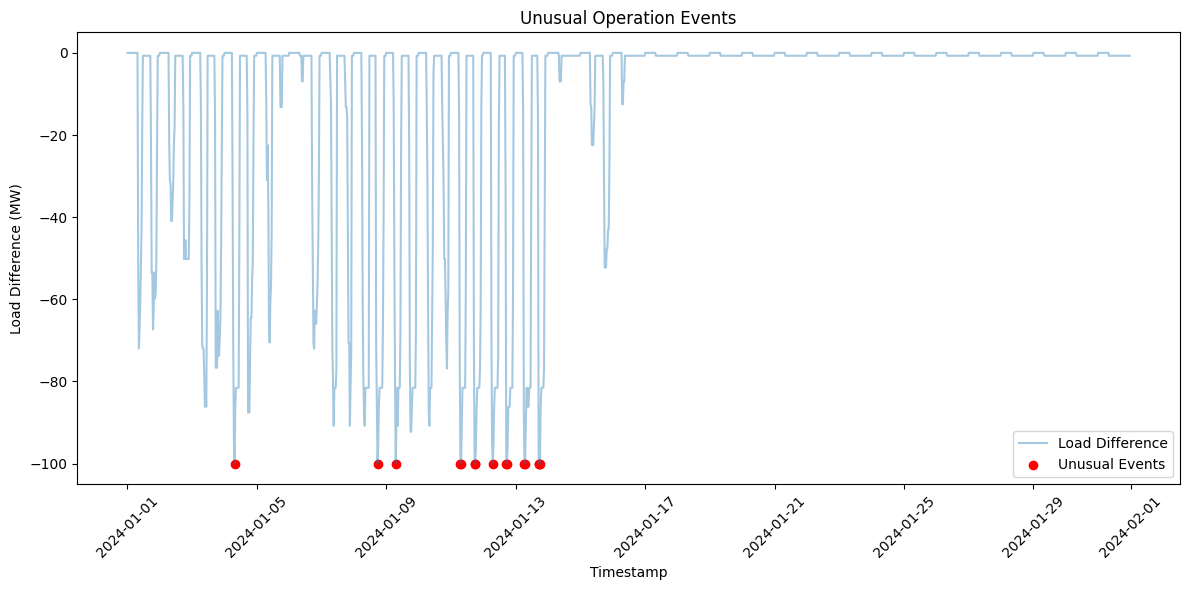

In [71]:
# Define a threshold for unusual events (e.g., using the 99th percentile of the absolute load difference)
threshold = df_2024['Load_Difference'].abs().quantile(0.99)

# Filter events where the absolute load difference exceeds the threshold
unusual_events = df_2024[df_2024['Load_Difference'].abs() > threshold]

# Display summary statistics of these events
print("Summary of unusual operation events:")
print(unusual_events[['Timestamp', 'OnLine_Load_MW', 'Estimated_Online_Load_Control_MW', 'Load_Difference']].describe())

# Visualize the load difference over time, marking the unusual events
plt.figure(figsize=(12,6))
plt.plot(df_2024['Timestamp'], df_2024['Load_Difference'], label='Load Difference', alpha=0.4)
plt.scatter(unusual_events['Timestamp'], unusual_events['Load_Difference'], color='red', label='Unusual Events')
plt.xlabel('Timestamp')
plt.ylabel('Load Difference (MW)')
plt.title('Unusual Operation Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Flagging unusual events helps identify abnormal load differences that warrant further investigation for potential sensor or operational anomalies.

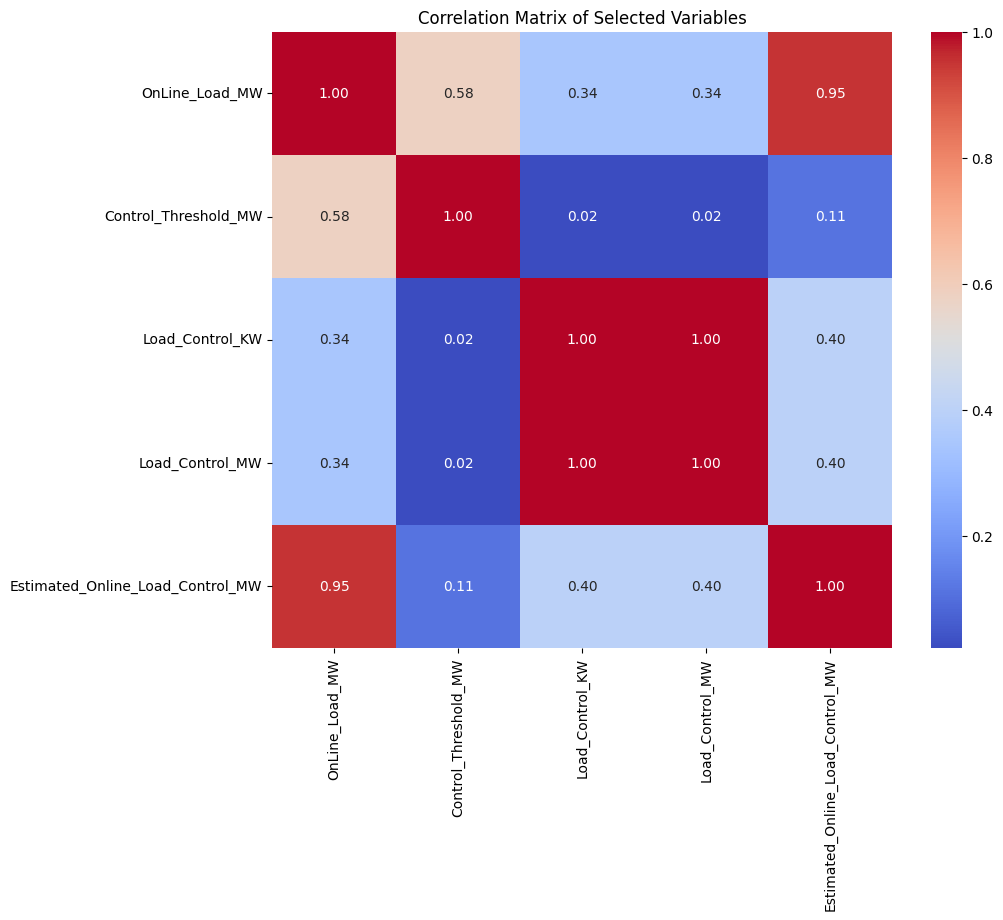

In [72]:
# Calculate Pearson correlation matrix for the relevant numeric columns
numeric_cols = ['OnLine_Load_MW', 'Control_Threshold_MW', 'Load_Control_KW',
                'Load_Control_MW', 'Estimated_Online_Load_Control_MW']
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [73]:
# Check the correlation between Load_Control_MW and Estimated_Online_Load_Control_MW
corr_value = corr_matrix.loc['Load_Control_MW', 'Estimated_Online_Load_Control_MW']
print("Correlation between Load_Control_MW and Estimated_Online_Load_Control_MW:", corr_value)

# Interpretation:
# A strong inverse correlation (i.e., a large negative value) would suggest that higher load control values
# associate with lower estimated online load, supporting the idea that load control effectively reduces the load.
# However, the correlation here is around 0.40, which is a moderate positive correlation, not strongly inverse.
#
# Thus, there is no strong inverse relationship between Load_Control_MW and Estimated_Online_Load_Control_MW.
# This result implies that load control does not directly manifest as a reduction in estimated load based on this metric.

Correlation between Load_Control_MW and Estimated_Online_Load_Control_MW: 0.39847822322352466


It appears that the load rarely approaches or exceeds the threshold. The low percentage of exceedances (both in control and online load), along with a high accuracy rate (~98%), indicates that control actions are generally effective in keeping the load within acceptable limits. Occasional exceedances seem to be outliers rather than a systematic issue.

The computed correlation coefficient between Load_Control_KW and Load_Control_MW is 1.0, which confirms they maintain a constant conversion ratio.

The very high correlation (≈0.95) between OnLine_Load_MW and Estimated_Online_Load_Control_MW reinforces that the estimation method closely tracks actual values, which is expected. However, the moderate correlation (≈0.58) between OnLine_Load_MW and Control_Threshold_MW might hint at underlying, perhaps counterintuitive, dependencies. It suggests that rather than simply reducing load inversely, the control threshold may be dynamically adjusted in relation to actual load values.

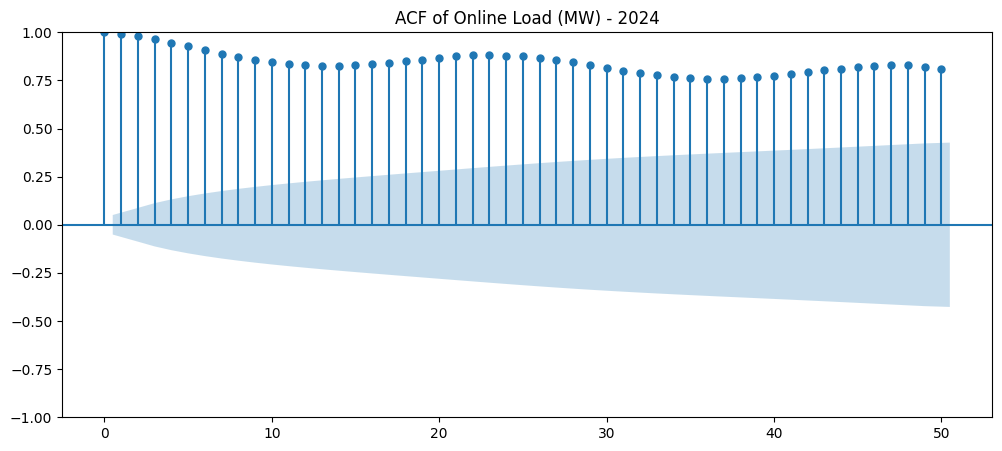

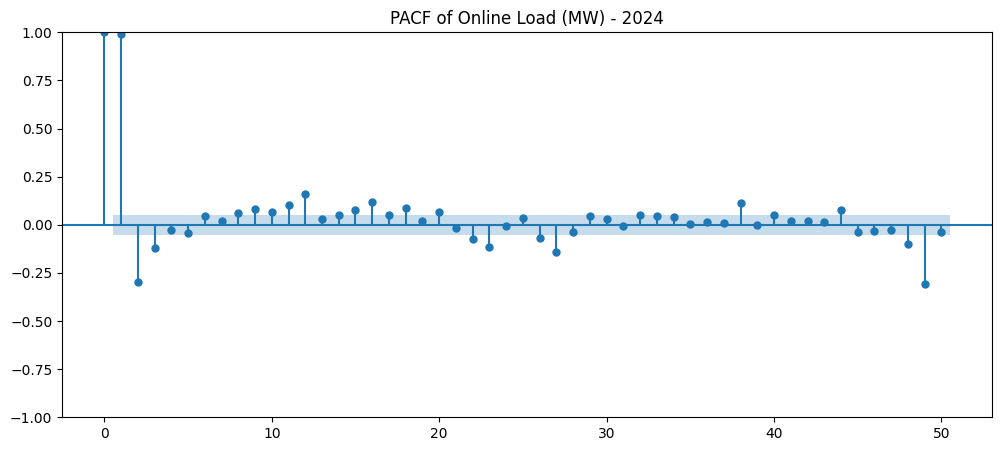

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the OnLine_Load_MW series for 2024, drop any missing values
load_ts = df_2024['OnLine_Load_MW'].dropna()

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(load_ts, lags=50, ax=plt.gca())
plt.title('ACF of Online Load (MW) - 2024')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(load_ts, lags=50, method='ywm', ax=plt.gca())
plt.title('PACF of Online Load (MW) - 2024')
plt.show()

The ACF plot shows significant autocorrelation at low lags that gradually decays,indicating that recent load values strongly influence future values. In contrast,the PACF plot has a dominant spike at lag 1 followed by a rapid drop-off. This patternsuggests that the OnLine_Load_MW series may be well modeled by a simple autoregressive (AR)process (possibly AR(1)), since most of the predictive power is contained in the immediately preceding observation.

# Stakeholder Update: SCADA Data Analysis

## Analysis Approach
- **Data Ingestion & Cleaning:**  
    - Imported merged SCADA datasets and performed initial EDA.
    - Identified and quantified missing values and duplicate rows.
    - Converted timestamps to datetime and ensured regular 30-minute intervals.

- **Exploratory Data Analysis (EDA):**  
    - Summarized key statistics for numerical fields.
    - Generated boxplots and histograms to assess distributions.
    - Conducted outlier detection using the IQR method on online load, control threshold, and load difference.


- **Correlation Analysis:**  
    - Developed a Pearson correlation matrix among key variables.
    - Noted both expected and counterintuitive relationships (e.g., moderate correlation between actual load and control threshold).

## Key Findings & Insights
- **Data Integrity:**  
    - Timestamps are mostly continuous, with minor gaps aligning with known daylight saving changes.
    - Missing and duplicate entries were minimal after cleaning.

- **Outlier Behavior:**  
    - Outliers were identified in both control thresholds and online load values.
    - Severity calculations helped quantify deviations, particularly flagging unusually high deviations in specific time periods.


- **Interesting Correlations:**  
    - The load control measures did not exhibit a simple inverse relationship with estimated load, suggesting dynamic threshold adjustments.
    - A strong correlation between actual load and estimated online load confirms the reliability of the estimation method.

## Next Steps
- **Deep Dive into Anomalies:**  
    - Conduct focused investigations on flagged unusual events to diagnose potential sensor or operational issues.
    - Explore the reasons behind counterintuitive correlation patterns between control-threshold and online load.

- **Model & Process Enhancement:**  
    - Assess if dynamic calibration of control thresholds is warranted based on evolving operational conditions.
    - Investigate the feasibility of integrating additional variables or external data sources to improve load control estimations.

- **Continuous Monitoring:**  
    - Establish real-time monitoring dashboards to track deviations and anomalies.
    - Set up alerts for unusual load differences to enable proactive operational responses.

This summary outlines our comprehensive approach and findings, guiding future efforts toward both operational improvements and further model refinements.


Autocorrelation Analysis:

- The ACF plot of the 2024 Online Load series shows strong autocorrelation at low lags, particularly a dominant spike at lag 1.
- The PACF plot indicates a sharp drop-off after lag 1, suggesting that most predictive power comes from the immediately preceding measurement.
- These patterns imply that the load series is well characterized by an AR(1) process, indicating that recent load values strongly influence near-future values.

This insight supports the reliability of our 30-minute interval data and opens avenues for enhanced load forecasting through time series modeling.
"""

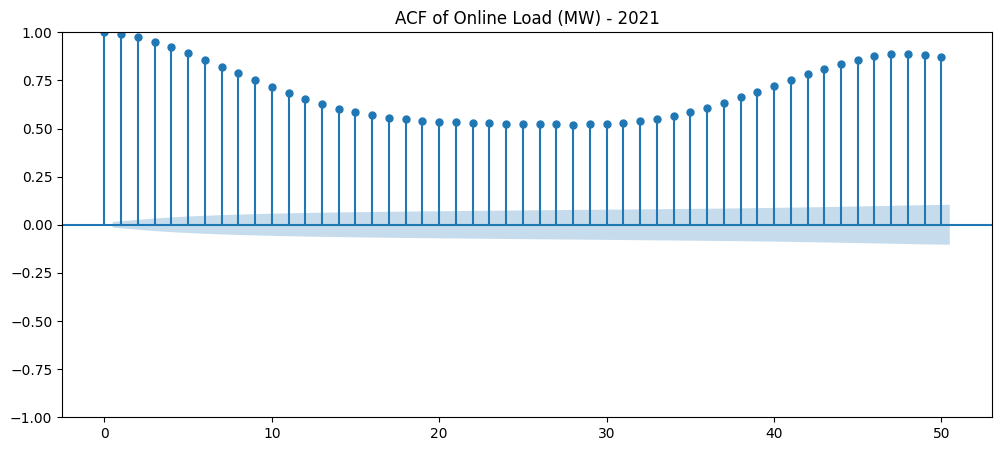

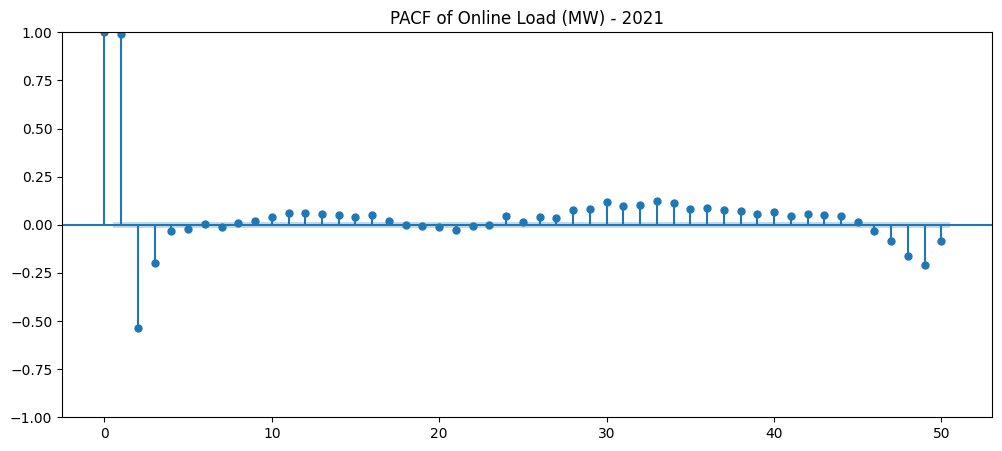

In [49]:
# Subset the dataframe for 2021
df_2021 = df[df['Timestamp'].dt.year == 2021].copy()

# Extract the Online Load series and remove missing values
load_ts_2021 = df_2021['OnLine_Load_MW'].dropna()

# Plot ACF for 2021
plt.figure(figsize=(12, 5))
plot_acf(load_ts_2021, lags=50, ax=plt.gca())
plt.title('ACF of Online Load (MW) - 2021')
plt.show()

# Plot PACF for 2021
plt.figure(figsize=(12, 5))
plot_pacf(load_ts_2021, lags=50, method='ywm', ax=plt.gca())
plt.title('PACF of Online Load (MW) - 2021')
plt.show()

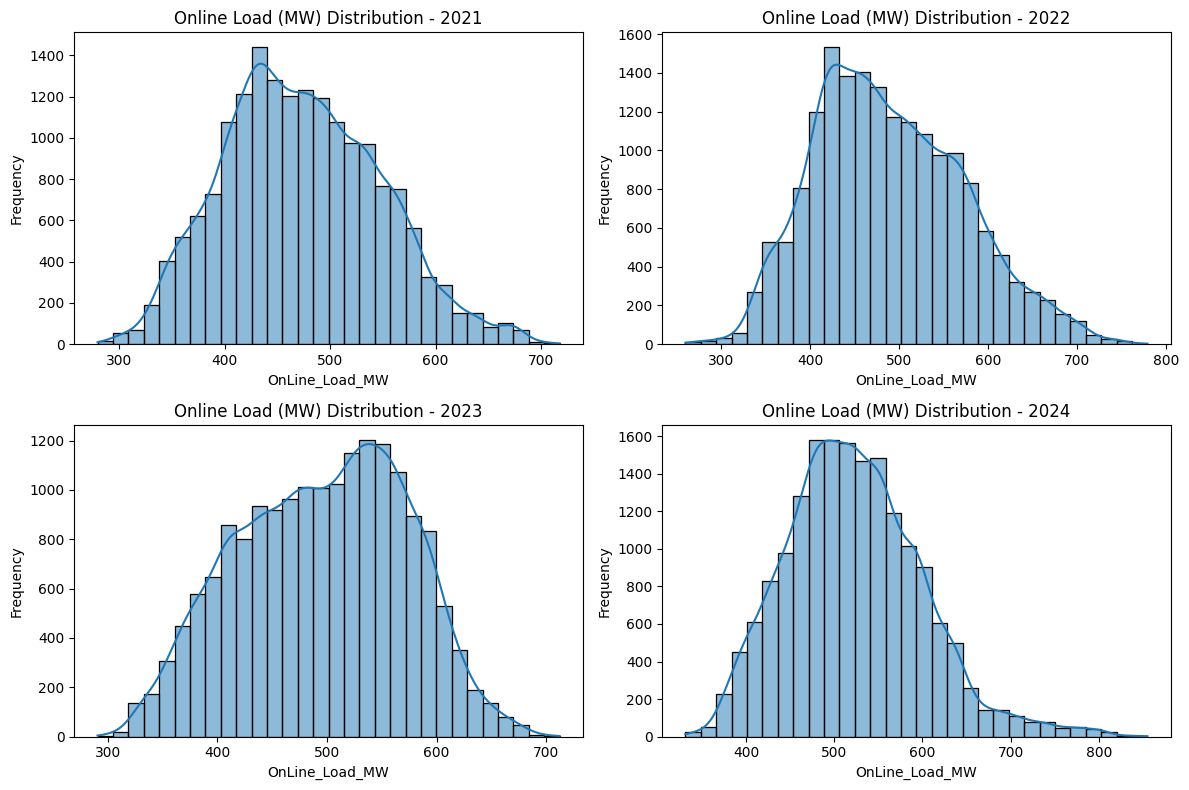

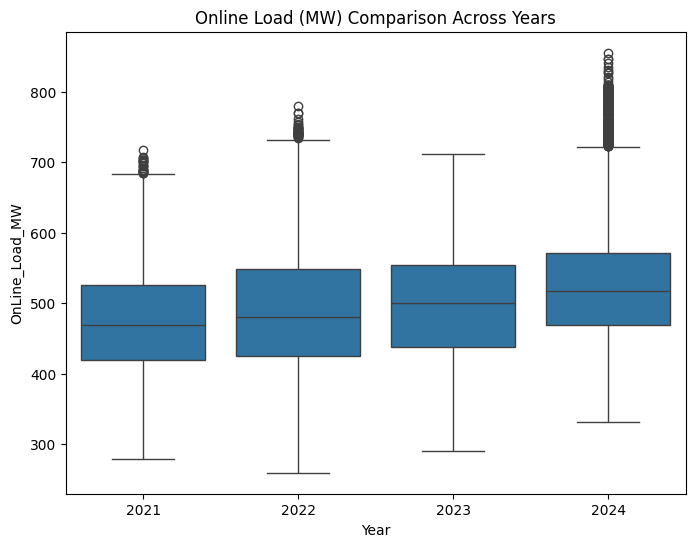

In [50]:
# Subset the data for each year and add a "Year" column
years = [2021, 2022, 2023, 2024]
df_list = []
for year in years:
    temp = df[df['Timestamp'].dt.year == year].copy()
    temp['Year'] = year
    df_list.append(temp)
df_years = pd.concat(df_list)

# Compare online load (MW) distribution with histograms in subplots
plt.figure(figsize=(12, 8))
for i, year in enumerate(years):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_years[df_years['Year'] == year]['OnLine_Load_MW'].dropna(), kde=True, bins=30)
    plt.title(f'Online Load (MW) Distribution - {year}')
    plt.xlabel('OnLine_Load_MW')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Compare online load (MW) across years with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='OnLine_Load_MW', data=df_years)
plt.title('Online Load (MW) Comparison Across Years')
plt.xlabel('Year')
plt.ylabel('OnLine_Load_MW')
plt.show()

The analysis so far offers several key insights that help address East River General’s load forecasting challenge:"

1. Time Series Dynamics:
    - Autocorrelation and partial autocorrelation analyses (ACF and PACF) indicate that recent load values are strong predictors 
      of near-future loads (dominance of lag-1 effects). This characteristic implies that time series models like ARIMA or simpler 
      AR(1) models may be effective over the 24–72 hour forecasting window.

2. Outlier Detection & Peak Flagging:
    - Outlier analysis via the IQR method has successfully flagged deviations in both control thresholds and online load values. 
      This suggests that even small shifts away from the norm can be detected, providing an early warning signal for potential 
      peaks. These insights are crucial for triggering preemptive load control adjustments to avoid high billing rates.



In summary, the current analysis confirms that our load estimation techniques are precise and our data-driven insights are 
actionable. These findings support further model development that not only forecasts load over a 24–72 hour window but also 
integrates weather conditions and evolving demand trends.

In [84]:
!jupyter nbconvert --to html "SCADA-EDA.ipynb"

[NbConvertApp] Converting notebook SCADA-EDA.ipynb to html
[NbConvertApp] Writing 1624477 bytes to SCADA-EDA.html


In [3]:
!pip install nbconvert

In [5]:
pip install pandoc

In [1]:
import pandoc
import nbconvert

In [1]:
!jupyter nbconvert --to pdf "SCADA-EDA.ipynb"

[NbConvertApp] Converting notebook SCADA-EDA.ipynb to pdf
[NbConvertApp] Support files will be in SCADA-EDA_files\
[NbConvertApp] Making directory .\SCADA-EDA_files
[NbConvertApp] Writing 100662 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 929035 bytes to SCADA-EDA.pdf
